In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
deaths = pd.read_excel(r"Cases_and_Deaths_by_County_2020-09-11_702087_7.xlsx")
county = pd.read_excel(r"Cases_by_County_and_Date_2020-09-11_702090_7.xlsx")
demographics = pd.read_excel(r"Cases_by_Demographics_Statewide_2020-09-11_702092_7.xlsx")
tests = pd.read_excel(r"Covid-19_Tests_by_County_2020-09-11_702093_7.xlsx")
diagnostic = pd.read_excel(r"Diagnostic_Tests_by_Result_and_County_2020-09-11_702094_7.xlsx")
population = pd.read_excel(r"Population_County.xlsx")

In [3]:
diagnostic.head()


,COUNTY,MessageDate,Negative,Positive,Total
0,Alcona,2020-03-17,1,0,1
1,Alcona,2020-03-20,2,0,2
2,Alcona,2020-03-23,1,0,1
3,Alcona,2020-03-24,1,0,1
4,Alcona,2020-03-25,1,0,1


In [4]:
population.head()

,Rank,County,Population
0,1,Wayne County,1749343
1,2,Oakland County,1257584
2,3,Macomb County,873972
3,4,Kent County,656955
4,5,Genesee County,405813


In [5]:
#population['County']["Alcona County"]
population.loc[population['County'] == "Alcona County"]


,Rank,County,Population
74,75,Alcona County,10405


In [6]:
for i in population["County"]:
    #print(i)
    new = i.replace(" County", "")
    #print(new)
    population["County"][population["County"] == i] = new
    #= new
population.head()

C:\Users\JSPAUN\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Rank,County,Population
0,1,Wayne,1749343
1,2,Oakland,1257584
2,3,Macomb,873972
3,4,Kent,656955
4,5,Genesee,405813


In [7]:
# Merge tables with population

deaths_norm = deaths.merge(population, left_on = "COUNTY", right_on = "County")
count_norm = county.merge(population, left_on = "COUNTY", right_on = "County")
#demographics.merge(population, left_on = "COUNTY", right_on = "County")
test_norm = tests.merge(population, left_on = "COUNTY", right_on = "County")
diag_norm = diagnostic.merge(population, left_on = "COUNTY", right_on = "County")

In [8]:
# Normalize necessary columns
deaths_norm[['Cases_norm', 'Deaths_norm']] = deaths_norm[['Cases', 'Deaths']].div(deaths_norm.Population, axis = 0)
count_norm[['Cases_norm', 'Deaths_norm','Cases.Cum_norm','Deaths.Cum_norm']] = count_norm[['Cases', 'Deaths', 'Cases.Cumulative','Deaths.Cumulative']].div(deaths_norm.Population, axis = 0)
test_norm[['Count_norm']] = test_norm[['Count']].div(deaths_norm.Population, axis = 0)
diag_norm[['Negative_norm', 'Postitive_norm','Total_norm']] = diag_norm[['Negative', 'Positive', 'Total']].div(deaths_norm.Population, axis = 0)

In [9]:
display(deaths_norm.head())
display(count_norm.head())
display(test_norm.head())
display(diag_norm.head())
#count_norm.columns

,COUNTY,CASE_STATUS,Cases,Deaths,Updated,Rank,County,Population,Cases_norm,Deaths_norm
0,Alcona,Confirmed,33,2,2020-09-11 14:11:24.584,75,Alcona,10405,0.003172,0.000192
1,Alcona,Probable,7,0,2020-09-11 14:11:24.584,75,Alcona,10405,0.000673,0.000000
2,Alger,Confirmed,16,0,2020-09-11 14:11:24.584,77,Alger,9108,0.001757,0.000000
3,Alger,Probable,1,0,2020-09-11 14:11:24.584,77,Alger,9108,0.000110,0.000000
4,Allegan,Confirmed,613,7,2020-09-11 14:11:24.584,18,Allegan,118081,0.005191,0.000059


,COUNTY,Date,CASE_STATUS,Cases,Deaths,Cases.Cumulative,Deaths.Cumulative,Updated,Rank,County,Population,Cases_norm,Deaths_norm,Cases.Cum_norm,Deaths.Cum_norm
0,Alcona,2020-03-01,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0
1,Alcona,2020-03-02,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0
2,Alcona,2020-03-03,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0
3,Alcona,2020-03-04,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0
4,Alcona,2020-03-05,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0


,COUNTY,TestType,Count,RatePerMillion,Updated,Rank,County,Population,Count_norm
0,Alcona,Serology,47,4517.0,2020-09-11 14:11:28.102,75,Alcona,10405,0.004517
1,Alcona,Diagnostic,1848,177607.0,2020-09-11 14:11:28.102,75,Alcona,10405,0.177607
2,Alcona,Total,1895,182124.0,2020-09-11 14:11:28.102,75,Alcona,10405,0.208059
3,Alger,Diagnostic,1040,114185.0,2020-09-11 14:11:28.102,77,Alger,9108,0.114185
4,Alger,Serology,66,7246.0,2020-09-11 14:11:28.102,77,Alger,9108,0.000559


,COUNTY,MessageDate,Negative,Positive,Total,Rank,County,Population,Negative_norm,Postitive_norm,Total_norm
0,Alcona,2020-03-17,1,0,1,75,Alcona,10405,0.000096,0.0,0.000096
1,Alcona,2020-03-20,2,0,2,75,Alcona,10405,0.000192,0.0,0.000192
2,Alcona,2020-03-23,1,0,1,75,Alcona,10405,0.000110,0.0,0.000110
3,Alcona,2020-03-24,1,0,1,75,Alcona,10405,0.000110,0.0,0.000110
4,Alcona,2020-03-25,1,0,1,75,Alcona,10405,0.000008,0.0,0.000008


Text(0.5,1,'Cases by County')

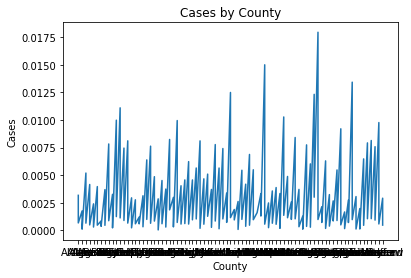

In [10]:
plt.plot(deaths_norm["County"], deaths_norm['Cases_norm'])
plt.ylabel("Cases")
plt.xlabel("County")
plt.title("Cases by County")
#plt.plot(deaths['MessageDate'], deaths['Positive_norm'])

In [11]:

#count_norm.groupby('COUNTY')['Cases'].plot(legend=True)

In [12]:
#display(count_norm)
count_mean = count_norm.groupby(['COUNTY','CASE_STATUS'], as_index=False).mean()
count_mean

,COUNTY,CASE_STATUS,Cases,Deaths,Cases.Cumulative,Deaths.Cumulative,Rank,Population,Cases_norm,Deaths_norm,Cases.Cum_norm,Deaths.Cum_norm
0,Alcona,Confirmed,0.169231,0.010256,14.358974,0.846154,75.0,10405.0,0.000012,1.361952e-07,0.000516,0.000029
1,Alcona,Probable,0.035897,0.000000,2.861538,0.000000,75.0,10405.0,NaN,NaN,NaN,NaN
2,Alger,Confirmed,0.082051,0.000000,3.974359,0.000000,77.0,9108.0,NaN,NaN,NaN,NaN
3,Alger,Probable,0.005128,0.000000,0.405128,0.000000,77.0,9108.0,NaN,NaN,NaN,NaN
4,Allegan,Confirmed,3.143590,0.035897,261.107692,3.933333,18.0,118081.0,NaN,NaN,NaN,NaN
5,Allegan,Probable,0.394872,0.000000,33.579487,0.000000,18.0,118081.0,NaN,NaN,NaN,NaN
6,Alpena,Confirmed,0.605128,0.071795,78.794872,8.117949,50.0,28405.0,NaN,NaN,NaN,NaN
7,Alpena,Probable,0.071795,0.000000,8.861538,0.000000,50.0,28405.0,NaN,NaN,NaN,NaN
8,Antrim,Confirmed,0.287179,0.000000,21.256410,0.000000,61.0,23324.0,NaN,NaN,NaN,NaN
9,Antrim,Probable,0.035897,0.000000,1.989744,0.000000,61.0,23324.0,NaN,NaN,NaN,NaN


In [13]:
count_norm.sort_values(by=["COUNTY","Date"])
type(count_norm)

pandas.core.frame.DataFrame

In [33]:
diff_max = 0.0
diff_min = 0.0
s_max_list = []
s_min_list = []
for index in count_norm.index:
    county = count_norm['COUNTY'][index]
    case_stat = count_norm['CASE_STATUS'][index]
    ind_mean = count_mean.loc[(count_mean['COUNTY'] == county) & (count_mean['CASE_STATUS'] == case_stat)]
    x = count_norm['Cases'][index]
    u = float(ind_mean['Cases'])
    diff_max = x-u + diff_max
    diff_min = x-u + diff_min
   
    s_max_list.append(max(0.0, diff_max))
    s_min_list.append(min(0.0, diff_min))
count_norm['Cases_max'] = s_max_list
count_norm['Cases_min'] = s_min_list



In [34]:
count_norm

,COUNTY,Date,CASE_STATUS,Cases,Deaths,Cases.Cumulative,Deaths.Cumulative,Updated,Rank,County,Population,Cases_norm,Deaths_norm,Cases.Cum_norm,Deaths.Cum_norm,Cases_max,Cases_min
0,Alcona,2020-03-01,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0,0.000000e+00,-0.169231
1,Alcona,2020-03-02,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0,0.000000e+00,-0.338462
2,Alcona,2020-03-03,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0,0.000000e+00,-0.507692
3,Alcona,2020-03-04,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0,0.000000e+00,-0.676923
4,Alcona,2020-03-05,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0,0.000000e+00,-0.846154
5,Alcona,2020-03-06,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0,0.000000e+00,-1.015385
6,Alcona,2020-03-07,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0,0.000000e+00,-1.184615
7,Alcona,2020-03-08,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0,0.000000e+00,-1.353846
8,Alcona,2020-03-09,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0,0.000000e+00,-1.523077
9,Alcona,2020-03-10,Confirmed,0,0,0,0,2020-09-11 14:11:24.988,75,Alcona,10405,0.0,0.0,0.0,0.0,0.000000e+00,-1.692308
